In [6]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import load
import pickle

In [7]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Latitudes

In [8]:
Baker_Lat=48.7767
Adams_Lat=46.2024
Glacier_Lat=48.1119
Rainier_Lat=46.8523
MedicineLake_offset=0.1
MSH_Lat=46.1914
Adams_Lat=46.2024
Hood_Lat=45.3736
Jefferson_Lat=44.6743
NorthSister_Lat=44.1662
SouthSister_Lat=44.1034
Sisters_Lat=44.13
CraterLake_Lat=42.85
Shasta_Lat=41.544
Lassen_Lat=40.654342
MedicineLake_Lat=41.6108
GVB_Lat=49.9366
Newberry_Lat=43.7221

# Plot and defining density-depth relationships

In [9]:
rho=2700
P_axis_min=-1
P_axis_max=6
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


### Geophysical constraints 

In [10]:
LPs=pd.read_excel(r'../Geophysics_April23.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Lassen=LPs.loc[LPs['Volcano']=="Lassen"]
LPs.head()

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
0,Lassen,40.654342,18.16,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
1,Lassen,40.654342,12.42,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
2,Lassen,40.654342,17.86,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
3,Lassen,40.654342,26.62,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
4,Lassen,40.654342,14.08,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN


In [11]:
rho=2700
P_axis_min2=0
P_axis_max2=10
D_axis_min2=100000*P_axis_min2/(9.8*rho)
D_axis_max2=100000*P_axis_max2/(9.8*rho)

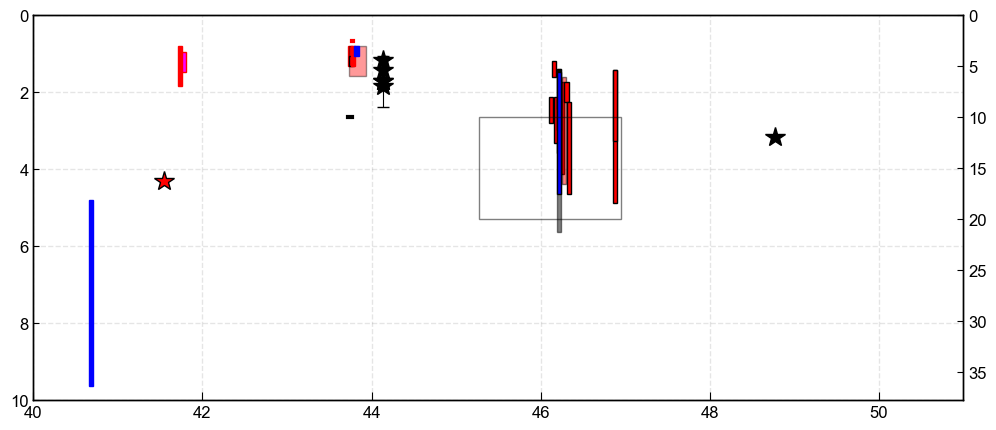

In [36]:
fig, (ax1) = plt.subplots(1, figsize=(12,5))
ax2 = ax1.twinx()
width=0.05
offset=0.05
import matplotlib.patches as patches

Adams_offset=0.2
################################# NEWBERRY VOLCANO ##################################
sep=0.5
width=0.05
### SEISMIC CONSTRAINTS
# Achauer 1988 - 3-5 km depth below the caldera
rect_A1988 = patches.Rectangle((Newberry_Lat,3),width, 2,linewidth=1,
                            edgecolor='r',facecolor='red')
ax2.add_patch(rect_A1988)

# Beachy 2012 - low central velocity at 3-6 km depth. Best fit, molten at 4-5 km depth
rect_B2012 = patches.Rectangle((Newberry_Lat+offset*0.3,3),0.2, 3,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=0.4)
ax2.add_patch(rect_B2012)
rect_B2012_M = patches.Rectangle((Newberry_Lat+offset*0.3,4),width, 1,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=1)
ax2.add_patch(rect_B2012_M)

# Heath et al. 2015 - 3-5 km below the crater flow. 
rect_H2015 = patches.Rectangle((Newberry_Lat+offset*0.6,3),width, 2,linewidth=1,
                            edgecolor='r',facecolor='red')
ax2.add_patch(rect_H2015)

# Heath et al. 2018 - P wave reflectoin at 2.5 km
ax2.plot([Newberry_Lat+offset*0.9, Newberry_Lat+offset*1.1],[2.5, 2.5], '-r',  lw=3)

# MT
rect_BM = patches.Rectangle((Newberry_Lat+offset*1.5,3),width, 1,linewidth=1,
                            edgecolor='b',facecolor='blue')
ax2.add_patch(rect_BM)

# Geodetics.
ax2.plot([Newberry_Lat, Newberry_Lat+width],[10, 10], '-k',  lw=3)


###################################### LASSEN PEAK #######################################
elev=3.189
stat_elev_diff=elev-2.25

# Park and Ostos (2013) MT
rect_PO = patches.Rectangle((Lassen_Lat,15+elev),width,15+elev,linewidth=1,
                            edgecolor='blue',facecolor='blue')
ax2.add_patch(rect_PO)

# Benz et al. (1992)
# rect_PO = patches.Rectangle((Lassen_Lat+offset,0+elev),width,15+elev,linewidth=1,
#                             edgecolor='r',facecolor='red')
# ax2.add_patch(rect_PO)

############################################ MOUNT SHASTA ############################3

elev=4.321
# # Thurber et al., (2009) LVZ - Doesnt explicitly say, but at one point, says below sea level in article, so presume all depths that way. 
ax2.plot(Shasta_Lat, 12+elev, '*k', mfc='red', ms=15)

############################################ MEDICINE LAKE ################################




# GChiarabba heter inversion, says 3-7 km depending on which 
rect_C1995_h = patches.Rectangle((MedicineLake_Lat+MedicineLake_offset,3),width,7-3,linewidth=1,
                            edgecolor='red',facecolor='red')

# Evans and Zucca, slightly different values
rect_EZ = patches.Rectangle((MedicineLake_Lat+MedicineLake_offset+offset,3.58), width,5.626-3.58,linewidth=1,
                            edgecolor='red',facecolor='magenta')
ax2.add_patch(rect_C1995_h)
ax2.add_patch(rect_EZ)

########################################### Three Sisters ###########################

elev=1.7 # Have choosen average elevation of ground around sisters, as source offset. 

# Wicks, 2002 - 6.5 +0.4
ax2.errorbar(Sisters_Lat, 6.5, xerr=0, yerr=0.4,  
             fmt='*', ecolor='k', elinewidth=0.8, mfc='k', 
             ms=15, mec='k', capsize=4)

# dzurisin 2006 - 6.5 +2.5 km depth - Best fit sill
ax2.errorbar(Sisters_Lat, 6.5, xerr=0, yerr=2.5, capsize=4,   fmt='*', ecolor='k', elinewidth=0.8, mfc='k', ms=15, mec='k')

#Dzurisin 2009 - 4.4 km if network translation ignored
ax2.plot(Sisters_Lat, 4.4, '*k', mfc='k', ms=15)
ax2.plot(Sisters_Lat, 5.4, '*k', mfc='k', ms=15)

# Riddick and Schmidt, 4-5.5 km bgl for mogi
rect_RS = patches.Rectangle((Sisters_Lat,4),width,1.5,linewidth=1,
                            edgecolor='black',facecolor='black')
ax2.add_patch(rect_RS)

# 7 km depth for Sill
ax2.plot(Sisters_Lat, 7, '*k', mfc='k', ms=15)


#################### MSH ########################################



elev=2.549 # Elevation of MSH in Km
mean_elev=elev-1.300 # Mean station elevation

sep=0.5
### SEISMIC CONSTRAINTS
MSH_offset=0.03
# Barker and Malone, 7-11 km bsl Aseismic Zone
rect_BM1991 = patches.Rectangle((MSH_Lat,7+elev),width, 11-7,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_BM1991)

# Musumeci et al. (2002) bsl Aseismic Zone
rect_M2002 = patches.Rectangle((MSH_Lat-MSH_offset,5.5+elev),width, 10-5.5,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_M2002)

# Waite and Moran, 2008 -  2-3.5 km - Low Velocity Zone
rect_WM2008 = patches.Rectangle((-MSH_offset*2+MSH_Lat,2+elev),width, 3.5-2,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_WM2008)

# Low evlocities at 5.5-8 k msl. 
rect_WM20082 = patches.Rectangle((-MSH_offset*3+MSH_Lat,5.5+elev),width, 8-5.5,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_WM20082)

# Kiser et al. 2016 -High VP-VS region 4-13 km bsl  
rect_K2016 = patches.Rectangle((MSH_offset*1+MSH_Lat,4+elev),width,13-4,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_K2016)

#  Kiser et al. 2018 - 3.5 to 14 km bsl. 
rect_K2018 = patches.Rectangle((MSH_offset*2+MSH_Lat,3.5+elev),width,14-3.5,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=0.5)
ax2.add_patch(rect_K2018)
# Highest melt fractions
rect_K2018H = patches.Rectangle((MSH_offset*3+MSH_Lat,4+elev),width,6-4,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=1)
ax2.add_patch(rect_K2018H)

# Ulberg et al. (2020) - 
rect_U2020 = patches.Rectangle((MSH_offset*4+MSH_Lat,6+elev),width,15-6,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_U2020)


################################### GEODETIC EVIDENCE

# Lisowski et al. GPS best fit, says 7.9 km from mean height of the volcano

rect_L = patches.Rectangle((MSH_Lat,7+mean_elev),width,8-7,linewidth=1,
                            edgecolor='k',facecolor='black')
ax2.add_patch(rect_L)



# Mastin et al. - top is at 5+-1 km, bottom is 10-20 km 
rect_M = patches.Rectangle((MSH_Lat,4+mean_elev),width,10-4,linewidth=1,
                            edgecolor='k',facecolor='black', alpha=1)
ax2.add_patch(rect_M)

rect_M2 = patches.Rectangle((MSH_Lat,4+mean_elev),width,20-4,linewidth=1,
                            edgecolor='k',facecolor='black', alpha=0.5)
ax2.add_patch(rect_M2)

## Magnetotelluric data 
# Hill et al. (2009)
rect_H1 = patches.Rectangle((MSH_Lat,3+elev),width,15-3,linewidth=1,
                            edgecolor='k',facecolor='blue', alpha=1)
ax2.add_patch(rect_H1)
# rect_H2 = patches.Rectangle((MSH_Lat,15+elev),width,25-15,linewidth=1,
#                             edgecolor='k',facecolor='blue', alpha=0.5)
# ax2.add_patch(rect_H2)



######################################## MOUNT ADAMS ##########################################

elev=3.7432 # Elevation of mt adams in km

sep=0.5

## Magnetotelluric data 
# # Hill et al. (2009)
# rect_H1 = patches.Rectangle((Adams_Lat+Adams_offset, 3+elev),width,25-10,linewidth=1,
#                             edgecolor='k',facecolor='blue', alpha=1)
# ax2.add_patch(rect_H1)


######################################### Mt. Rainier #########################################
elev=4.3925 # Elevation of Rainier in Km
mean_elev=elev-1.300 # Mean station elevation

sep=0.5
### SEISMIC CONSTRAINTS
# Moran et al. 199 - P wave.
rect_M1999 = patches.Rectangle((Rainier_Lat,1+elev),width, 14-1,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_M1999)

# Flinders and Shen, 2017.
rect_FS2017 = patches.Rectangle((Rainier_Lat,1+elev),width, 8-1,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_FS2017)

# General region of Mt. St. Helens to Mt. Rainier
# LatDiff=Rainier_Lat-MSH_Lat
# rect_H1 = patches.Rectangle((LatDiff+MSH_Lat, 15),LatDiff,30,linewidth=1,
#                              edgecolor='k',facecolor='blue', alpha=1)
# ax2.add_patch(rect_H1)


############################ Mount Baker ################################################
av_stat_level=2.000
summit_height=3.2876
dif=summit_height-av_stat_level
## Hodge and Crider - GPS.
ax2.plot(Baker_Lat, 5.8+dif, 12, '*k', mfc='black', ms=15)



# Glacier peak - Nothing
# Baker - Hodge and Crider
av_stat_level=2000
summit_height=3287.6
dif=summit_height-av_stat_level
## Hodge and Crider - GPS.
ax2.plot(Baker_Lat,  12, '*k', mfc='black', ms=15)


ax1.set_ylim([P_axis_max2, P_axis_min2])
ax2.set_ylim([D_axis_max2, D_axis_min2])

rect_regional = patches.Rectangle((Rainier_Lat+0.1,10), Hood_Lat-Rainier_Lat-0.2, 10, linewidth=1,
                            edgecolor='k',facecolor='None', alpha=0.5)
ax2.add_patch(rect_regional)



# ax1.set_xticks([Lassen_Lat, Shasta_Lat, MedicineLake_Lat+MedicineLake_offset, CraterLake_Lat, Newberry_Lat, Sisters_Lat, 
#                 Jefferson_Lat, Hood_Lat, MSH_Lat+offset, Adams_Lat+Adams_offset,
#                Rainier_Lat, Glacier_Lat, Baker_Lat])
# ax1.set_xticklabels(['Lassen', 'Shasta', 'Medicine Lake', 'Crater Lake', 'Newberry', 'Sisters', 'Jefferson', 'Hood', 'MSH', 'Adams', 'Rainier',
#                     'Glacier', 'Baker'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.grid(color = 'k', linestyle = '--', axis='x',linewidth = 1, alpha = 0.1, zorder=0)
ax1.set_xlim([40, 51])
#ax2.set_xticklabels([40, 42, 44])
# ax2.set_xticks([40, 42, 44, 46, 48, 50])
# ax2.set_xticklabels([40, 42, 44, 46, 48, 50])
ax2.set_xlim([40, 51])


# ax1.set_ylabel('Pressure (kbar)')
# ax2.set_ylabel('Depth (km)')

fig.savefig('Along_arc_Geophys.png', dpi=200, transparent=True)

In [13]:
D_axis_max2

37.792894935752074

## Loading 2022 Dan Rasmusen data

In [15]:
geo_df=pd.read_excel('Rasmussen_2022_Science.xlsx', sheet_name='Geophysic_Comp')
geo_df['Av']=(geo_df['Depth_min_km']+geo_df['Depth_max_km'])/2

In [16]:
geo_df['Technique'].unique()

array(['Seismicity', 'InSAR', 'GPS', 'Geodesy', 'Multidisciplinary',
       'Infrasound', 'GPS, InSAR', 'Tilt', 'EM', 'InSAR, GPS', 'MT',
       'Leveling', 'Gravity', 'EDM', 'GPS, Tilt', 'Muon radiography', nan],
      dtype=object)

In [17]:
geo_geod=geo_df.loc[(geo_df['Technique']=="GPS") | 
                    (geo_df['Technique']=="GPS, InSAR") | 
                     (geo_df['Technique']=="Geodesy") | 
                    (geo_df['Technique']=="Gravity") | 
                    (geo_df['Technique']=="Tilt") | 
                    (geo_df['Technique']=="Leveling") | 
                    (geo_df['Technique']=="EDM") | 
                   (geo_df['Technique']=="InSAR")]

In [18]:
geo_seis=geo_df.loc[geo_df['Technique']=="Seismicity"]
geo_geod=geo_df.loc[(geo_df['Technique']=="GPS") | 
                    (geo_df['Technique']=="GPS, InSAR") | 
                     (geo_df['Technique']=="Geodesy") | 
                    (geo_df['Technique']=="Gravity") | 
                    (geo_df['Technique']=="Tilt") | 
                    (geo_df['Technique']=="Leveling") | 
                    (geo_df['Technique']=="EDM") | 
                   (geo_df['Technique']=="InSAR")]


geo_MT=geo_df.loc[(geo_df['Technique']=="EM")|
                  (geo_df['Technique']=="MT")
                   ]

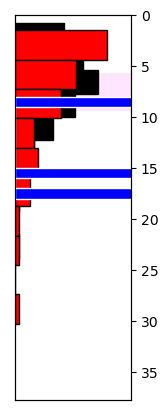

In [41]:
fig, (ax1) = plt.subplots(1, figsize=(1.5,5))
ax2 = ax1.twinx()
ax2.hist(geo_geod['Av'], orientation="horizontal", facecolor='black', ec='k'
        , density='True')

ax2.hist(geo_seis['Av'], orientation="horizontal", facecolor='red', ec='k'
       , density='True')
ax2.hist(geo_MT['Av'], orientation="horizontal", facecolor='blue', ec='w', density='True')

ax1.set_ylim([P_axis_max2, P_axis_min2])
ax2.set_ylim([D_axis_max2, D_axis_min2])
ax1.set_xticks([])
rect_Huber = patches.Rectangle((0,1.5),35,1,linewidth=1,
                            edgecolor='None',facecolor='magenta', alpha=0.1)

ax1.add_patch(rect_Huber)
ax1.set_yticks([])
ax1.set_xlim([0, 0.15])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1)

fig.savefig('DanR.png', dpi=200,bbox_inches='tight', transparent=True)

NameError: name 'ax' is not defined

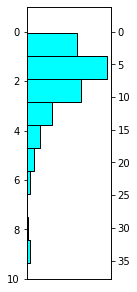

In [39]:
fig, (ax1) = plt.subplots(1, figsize=(1.5,5))
ax2 = ax1.twinx()
ax2.hist(geo_df['Av'], orientation="horizontal", facecolor='cyan', ec='k', bins=10)
ax1.set_ylim([P_axis_max2, P_axis_min2])
ax2.set_ylim([D_axis_max2, D_axis_min2])
ax1.set_xticks([])
rect_Huber = patches.Rectangle((0,1.5),35,1,linewidth=1,
                            edgecolor='None',facecolor='magenta', alpha=0.1)

ax1.add_patch(rect_Huber)
#ax1.set_yticks([])
ax.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1)

fig.savefig('DanR.png', dpi=200,bbox_inches='tight')

## Loading Dans data

In [35]:
Dan=pd.read_excel('Rasmussen.xlsx', sheet_name='Python')

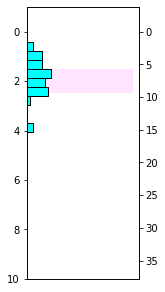

In [56]:
fig, (ax1) = plt.subplots(1, figsize=(2,5))
ax2 = ax1.twinx()
Dan['Av']=0.5*Dan['Depthmina (km)']+0.5*Dan['Depthmaxa (km)'] 
ax2.hist(Dan['Av'], orientation="horizontal", facecolor='cyan', ec='k')
ax1.set_ylim([P_axis_max2, P_axis_min2])
ax2.set_ylim([D_axis_max2, D_axis_min2])
ax1.set_xticks([])
rect_Huber = patches.Rectangle((0,1.5),35,1,linewidth=1,
                            edgecolor='None',facecolor='magenta', alpha=0.1)
ax1.add_patch(rect_Huber)

fig.savefig('DanR.png', dpi=200,bbox_inches='tight')